In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
# 넘파이 데이터 세트를 판다스 DataFrame으로 변환
columns = ['sepal_length', 'sepal_width', 'patel_length', 'petal_width']
irisDF = pd.DataFrame(iris.data, columns=columns)
irisDF['target'] = iris.target
irisDF.head(3)

,sepal_length,sepal_width,patel_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


- 각 품종에 따라 원본 붓꽃 데이터 세트가 어떻게 분포돼 있는지 2차원으로 시각화해 보자
- 2차원으로 표현하므로 두 개의 속성인 sepal length와 sepal width를 X축, Y축으로 해 품종 데이터 분포를 나타냄

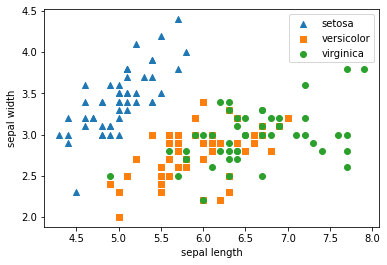

In [2]:
# setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers=['^', 's', 'o']

# setosa의 target 값은 0, versicolor는 1, virginica는 2
# 각 target별로 다른 모양으로 산점도로 표시
for i, marker in enumerate(markers):
    x_axis_data = irisDF[irisDF['target']==i]['sepal_length']
    y_axis_data = irisDF[irisDF['target']==i]['sepal_width']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])
    
plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

- setosa 품종의 경우 sepal width가 3.0보다 크고, sepal length가 6.0 이하인 곳에 일정하게 분포돼있음
- Versicolor와 virginica의 경우는 sepal width와 sepal length 조건만으로는 분류가 어려운 복잡한 조건임을 알 수 있음
- 이제 PCA로 4개 속성을 2개로 압축한 뒤 앞의 예제와 비슷하게 2개의 PCA 속성으로 붓꽃 데이터의 품종 분포를 2차원으로 시각화해 보자

- 먼저 붓꽃 데이터 세트에 바로 PCA를 적용하기 전에 개별 속성을 함께 스케일링 해야 함
- PCA는 여러 속성의 값을 연산해야 하므로 **속성의 스케일에 영향**을 받음

    ⇒ 따라서 여러 속성을 PCA로 압축하기 전에 **각 속성값을 동일한 스케일로 변환**하는 것 필요

In [3]:
from sklearn.preprocessing import StandardScaler

# Target 값을 제외한 모든 속성 값을 StandardScaler를 이용해 표준 정규 분포를 가지는 값들로 변환
iris_scaled = StandardScaler().fit_transform(irisDF.iloc[:, :-1])

In [4]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

# fit()과 trnasform()을 호출해 PCA 변환 데이터 반환
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)
print(iris_pca.shape)

(150, 2)


- PCA 객체의 transform() 메서드를 호출해 원본 데이터 세트를 (150, 2)의 데이터 세트로 iris_pca 객체 변수로 반환
- iris_pca는 변환된 PCA 데이터 세트를 150x2 넘파이 행렬로 가지고 있음 => DataFrame으로 변환한 뒤 데이터값 확인

In [5]:
# PCA 변환된 데이터의 칼럼 명을 각각 pca_component_1, pca_component_2로 명명
pca_columns = ['pca_component_1', 'pca_component_2']
irisDF_pca = pd.DataFrame(iris_pca, columns=pca_columns)
irisDF_pca['target'] = iris.target
irisDF_pca.head(3)

,pca_component_1,pca_component_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0


- 이제 2개의 속성으로 PCA 변환된 데이터 세트를 2차원상에서 시각화해 보자
- pca_component_1 속성을 X축으로, pca_component_2 속성을 Y축으로 해서 붓꽃 품종이 어떻게 분포되는지 확인

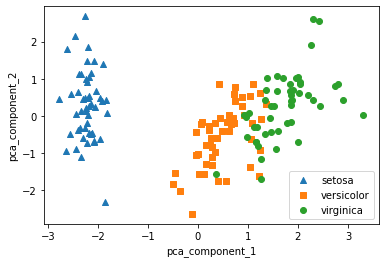

In [6]:
# setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers=['^', 's', 'o']

# pca_component_1을 x축으로, pca_component_2를 y축으로 scatter plot 수행
for i, marker in enumerate(markers):
    x_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_1']
    y_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])
    
plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

- PCA 변환한 후에도 pca_component_1축을 기반으로 Setosa 품종은 명확하게 구분이 가능
- Versicolor와 Virginica는 pca_component_1축을 기반으로 서로 겹치는 구분이 일부 존재하지만, 비교적 잘 구분됨
- 이는 PCA의 첫 번째 새로운 축인 pca_component_1이 원본 데이터의 변동성을 잘 반영했기 때문
- PCA Component별로 원본 데이터의 변동성을 얼마나 반영하는지 알아보자
- PCA 변환을 수행한 PCA 객체의 explained_varianced_ratio_ 속성은 전체 변동성에서 개별 PCA component별로 차지하는 변동성 비율을 제공

In [7]:
print(pca.explained_variance_ratio_)

[0.72962445 0.22850762]


- 첫 번째 PCA 변환 요소인 pca_component_1이 전체 변동성의 약 72.9%, 두 번째인 pca_component_2가 약 22.8% 차지
- 따라서 PCA를 2개 요소로만 변환해도 원본 데이터의 변동성을 95% 설명할 수 있음
- 이번엔 붓꽃 데이터 세트와 PCA로 변환된 데이터 세트에 각각 분류를 적용한 후 결과를 비교해보자

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

rcf = RandomForestClassifier(random_state=156)
scores = cross_val_score(rcf, iris.data, iris.target, scoring='accuracy', cv=3)
print('원본 데이터 교차 검증 개별 정확도: ', scores)
print('원본 데이터 평균 정확도: ', np.mean(scores))

원본 데이터 교차 검증 개별 정확도:  [0.98 0.94 0.96]
원본 데이터 평균 정확도:  0.96


In [13]:
pca_X = irisDF_pca[['pca_component_1', 'pca_component_2']]
scores_pca = cross_val_score(rcf, pca_X, iris.target, scoring='accuracy', cv=3)
print('PCA 변환 데이터 교차 검증 개별 정확도: ', scores_pca)
print('PCA 변환 데이터 평균 정확도: ', np.mean(scores_pca))

PCA 변환 데이터 교차 검증 개별 정확도:  [0.88 0.88 0.88]
PCA 변환 데이터 평균 정확도:  0.88


- 원본 데이터 세트 대비 예측 정확도는 PCA 변환 차원 개수에 따라 예측 성능이 떨어질 수밖에 없음
- 위 붓꽃 데이터의 경우는 4개의 속성이 2개의 변환 속성으로 감소하면서 예측 성능의 정확도가 원본 데이터 대비 10% 하락
    - 10%의 정확도 하락은 비교적 큰 성능 수치 감소지만, 4개의 속성이 2개로, 속성 개수가 50% 감소한 것을 고려한다면 PCA 변환 후에도 원본 데이터의 특성을 상당 부분 유지하고 있음을 알 수 있음